In [1]:
import matplotlib.pyplot as plt
import fundus_image_toolbox as fit

This script aligns a "moving" image to a "fixed" image using SuperRetina from <br>
[<i>Jiazhen Liu et al., "Semi-Supervised Keypoint Detector and Descriptor for Retinal Image Matching" (2022)</i>](https://arxiv.org/abs/2207.07932)

Load the default config dictionary and adjust as desired. The settings (apart from `device`) modify the behavior of the knn-matcher, which is used to find correspondences between the images based on the keypoints found by SuperRetina.

In [2]:
config = fit.get_registration_config()
config['device'] = 'cpu'

display(config)

{'device': 'cpu',
 'use_matching_trick': True,
 'nms_size': 1,
 'nms_thresh': 0.0005,
 'knn_thresh': 0.85,
 'model_save_path': '/gpfs01/berens/user/jgervelmeyer/fundus_image_toolbox/fundus_image_toolbox/registration/SuperRetina/save/SuperRetina.pth',
 'model_image_height': 512,
 'model_image_width': 512}

In [3]:
fixed_image = '../fundus_image_toolbox/registration/example1.jpg'
moving_image = '../fundus_image_toolbox/registration/example2.jpg'

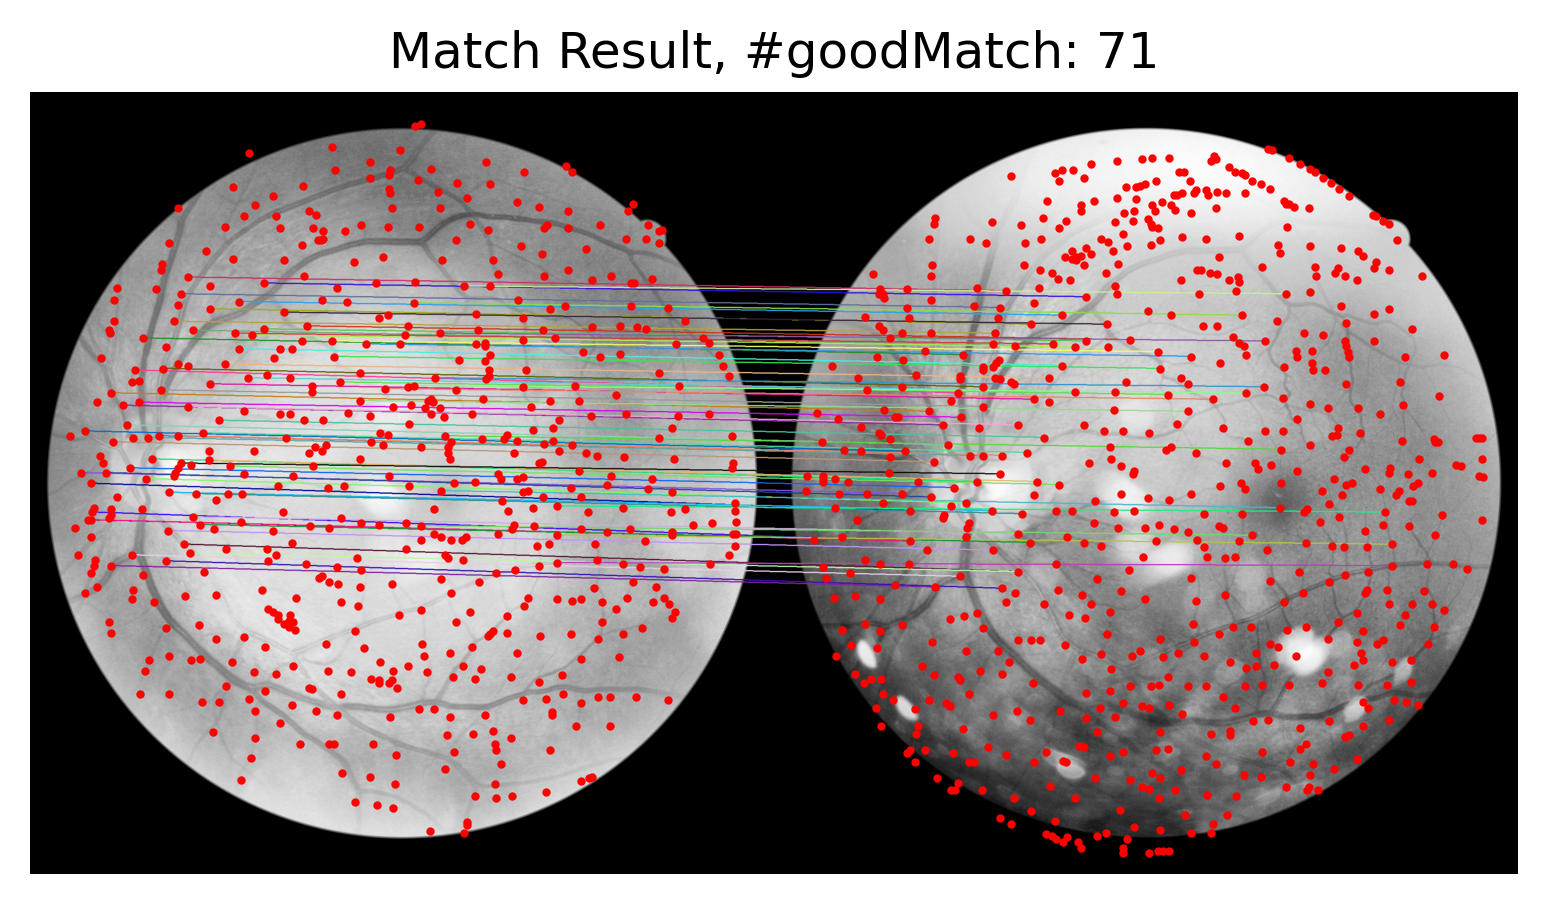

The rate of inliers: 89.873%


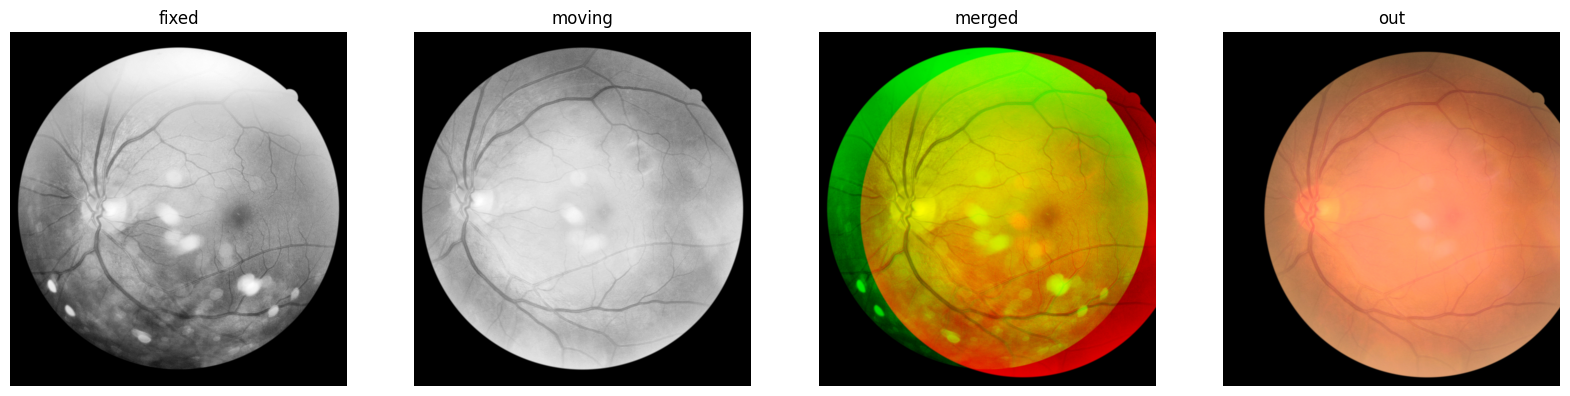

Size of the moving and aligned images: (1824, 1736, 3) (1824, 1736, 3)
Use at least 512px images, as this is the internally used size. As can be seen from the above, the final output image keeps the original size.


In [4]:
model, matcher = fit.load_registration_model(config)

moving_image_aligned = fit.register(
    fixed_image, 
    moving_image, 
    show=True, 
    show_mapping=True, 
    config=config, 
    model=model, 
    matcher=matcher
)

print("Size of the moving and aligned images:", plt.imread(moving_image).shape, moving_image_aligned.shape)
print("Use at least 512px images, as this is the internally used size. As can be seen from the above, the final output image keeps the original size.")